# Testing PyVista Visualizations in JupyterLab with itkwidgets

This program is free software; you can redistribute it and#or modify it under the terms of the GNU General Public License as published by the Free Software Foundation; either version 2 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this program; if not, write to the Free Software Foundation, Inc., 59 Temple Place - Suite 330, Boston, MA  02111-1307, USA.

## Example 1
Python code inspired on the example from https://www.pyvista.org/ describing short how to implement pyvista into jupyter notebook.

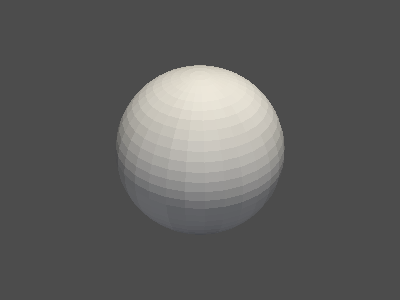

In [1]:
import pyvista
sphere = pyvista.Sphere()

plotter = pyvista.Plotter(notebook=True, window_size=[400, 300])
plotter.add_mesh(sphere)
plotter.show()

## Example 2
Example to plot 3D parametric function (i.e.: supertoroid) based on my example located at https://github.com/wawosz

In [2]:
# standard imports
import pyvista
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
# function definition
def supertorus(yScale, xScale, Height, InternalRadius, Vertical, Horizontal,
               deltaX=0, deltaY=0, deltaZ=0):
  
    #  initial range for values used in parametric equation
    n = 100
    u = np.linspace(-np.pi, np.pi, n)
    t = np.linspace(-np.pi, np.pi, n)
    u, t = np.meshgrid(u, t)

    # a1: Y Scale <0, 2>
    a1 = yScale
    # a2: X Scale <0, 2>
    a2 = xScale
    # a3: Height <0, 5>
    a3 = Height
    # a4: Internal radius <0, 5>
    a4 = InternalRadius
    # e1: Vertical squareness <0.25, 1>
    e1 = Vertical
    # e2: Horizontal squareness <0.25, 1>
    e2 = Horizontal

    # Definition of parametric equation for supertorus
    x = a1 * (a4 + np.sign(np.cos(u)) * np.abs(np.cos(u)) ** e1) *\
        np.sign(np.cos(t)) * np.abs(np.cos(t)) ** e2
    y = a2 * (a4 + np.sign(np.cos(u)) * np.abs(np.cos(u)) ** e1) *\
        np.sign(np.sin(t)) * np.abs(np.sin(t)) ** e2
    z = a3 * np.sign(np.sin(u)) * np.abs(np.sin(u)) ** e1
    
    grid = pyvista.StructuredGrid(x + deltaX + 5, y + deltaY + 5, z + deltaZ)
    return grid 

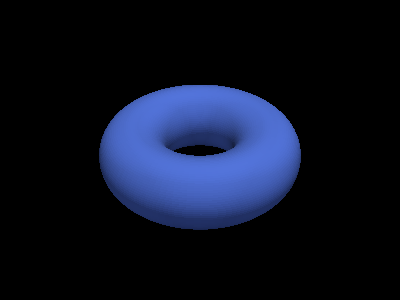

In [4]:
# setup the screen to plot image
p = pyvista.Plotter(notebook=True,window_size=[400, 300])
p.set_background(color='black')
surface = supertorus(yScale=1.0, xScale=1.0, Height=1.0, InternalRadius=2.0, Vertical=1.0, Horizontal=1.0)
p.add_mesh(surface, color=[random.random(), 0.5, 1], opacity=1)
p.show()

## Example 3
This example illustrates how to create an interactive vtk window

In [5]:
import pyvista as pv
from pyvista import examples

dataset = examples.load_hexbeam()
p = pv.BackgroundPlotter()
p.add_mesh(dataset)
p.show_bounds(grid=True, location='back')

(vtkRenderingAnnotationPython.vtkCubeAxesActor)0x7f5542d6da60

## Example 4
This example uses itkwidgets from Example 3 but to plot supertoroids

In [6]:
import numpy as np
import pyvista as pv

# get dataset for the glyphs: supertoroid in xy plane
saucer = pv.ParametricSuperToroid(ringradius=1, n2=1, zradius=1)
saucer.rotate_y(90)
# saucer.plot()  #  <-- check how a single saucer looks like

# get dataset where to put glyphs
x,y,z = np.mgrid[-10:10, -10:10, :1]
mesh = pv.StructuredGrid(x, y, z)

# construct the glyphs on top of the mesh
glyphs = mesh.glyph(geom=saucer, factor=0.3)
# glyphs.plot()  #  <-- simplest way to plot it

# create Plotter and add our glyphs with some nontrivial lighting
plotter = pv.BackgroundPlotter()
plotter.set_background(color='black')
plotter.add_mesh(glyphs, color=[0.5, 0.2, 0.2], specular=1, specular_power=15)

plotter.show()